In [141]:
import pandas as pd
from datetime import datetime, date

In [60]:
df = pd.read_csv('external_data_new.csv')

In [85]:
covid_data = pd.read_csv('sp-pe-tb-quot-fra-2021-12-06-19h05.csv', sep=";")

In [86]:
covid_data

,fra,jour,P_f,P_h,P,pop_f,pop_h,cl_age90,pop
0,FR,2020-05-13,7,6,13,3.802090e+06,3.961116e+06,9,7.763206e+06
1,FR,2020-05-13,21,7,28,4.066327e+06,4.270159e+06,19,8.336486e+06
2,FR,2020-05-13,64,41,105,3.736780e+06,3.740007e+06,29,7.476787e+06
3,FR,2020-05-13,66,43,109,4.266384e+06,4.028988e+06,39,8.295372e+06
4,FR,2020-05-13,62,40,102,4.355127e+06,4.237760e+06,49,8.592886e+06
...,...,...,...,...,...,...,...,...,...
6265,FR,2021-12-03,2200,2009,4257,4.209746e+06,3.794337e+06,69,8.004083e+06
6266,FR,2021-12-03,1172,980,2168,3.096658e+06,2.598981e+06,79,5.695639e+06
6267,FR,2021-12-03,486,326,814,1.993318e+06,1.251963e+06,89,3.245281e+06
6268,FR,2021-12-03,248,92,341,6.720700e+05,2.405106e+05,90,9.125806e+05


<AxesSubplot:xlabel='jour', ylabel='P'>

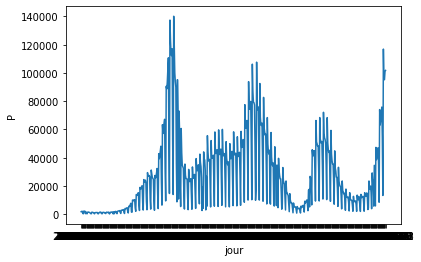

In [87]:
import seaborn as sns

covid_data = covid_data.groupby('jour').sum()

sns.lineplot(data=covid_data, x='jour', y='P')

La tendance est la bonne au niveau national mais il y a beaucoup de variations inattendues. On s'intéresse au mois de novembre (par exemple) pour comprendre ça.

In [88]:
covid_data_november = covid_data[(covid_data.index > '2021-11-01') & (covid_data.index < '2021-11-30')]

<AxesSubplot:xlabel='jour', ylabel='P'>

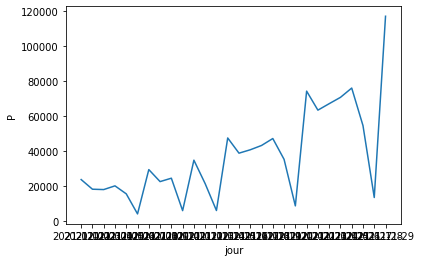

In [91]:
sns.lineplot(data=covid_data_november, x='jour', y='P')

On voit la chute tous les week-ends. Pour pallier ce problème on va faire une moyenne sur les 7 derniers jours.

In [92]:
covid_data['date_datetime'] = covid_data.index

In [93]:
covid_data['date_datetime'] = pd.to_datetime(covid_data.date_datetime)

In [99]:
covid_data['covid_last7'] = covid_data['P'].rolling(window=7, min_periods=1).mean()

<AxesSubplot:xlabel='jour', ylabel='covid_last7'>

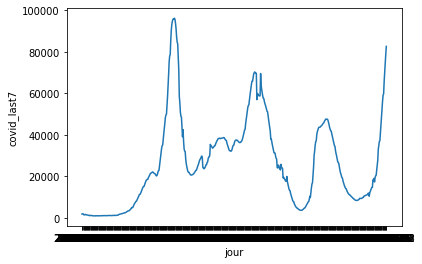

In [102]:
sns.lineplot(data=covid_data, x='jour', y='covid_last7')

On voit qu'on a bien réduit le bruit lié aux week-ends.

In [101]:
covid_data_mean = covid_data['covid_last7']

In [103]:
covid_data_mean

jour
2020-05-13     1792.000000
2020-05-14     1901.000000
2020-05-15     1961.000000
2020-05-16     1616.750000
2020-05-17     1350.200000
                  ...     
2021-11-29    65866.714286
2021-11-30    70451.714286
2021-12-01    74496.714286
2021-12-02    78858.857143
2021-12-03    82568.285714
Name: covid_last7, Length: 570, dtype: float64

In [104]:
new_df = df.join(other=covid_data_mean, on='date_datetime')
new_df['date'] = pd.to_datetime(new_df['date'])

<AxesSubplot:xlabel='date_datetime', ylabel='covid_last7'>

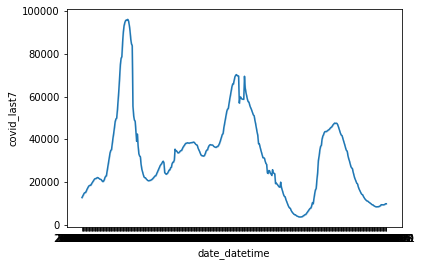

In [105]:
sns.lineplot(data=new_df, x='date_datetime', y='covid_last7') # just a sanity check

In [123]:
car_data = pd.read_csv('comptage-multimodal-comptages.csv', sep = ';')

In [124]:
car_data

,Identifiant trajectoire,Identifiant site,Nom du site,Date et heure de comptage,Mode déplacement,Nombre de véhicules,Type voie,Sens de circulation,Trajectoire,Coordonnées Géo
0,10023_5 -> 1,10023,[Paris] CF318 Rivoli x Lobau,2021-03-16T13:00:00+01:00,"Véhicules lourds > 3,5t",5,Voie de circulation générale,E-O,5 -> 1,"48.856949,2.353837"
1,10023_5 -> 1,10023,[Paris] CF318 Rivoli x Lobau,2021-03-16T14:00:00+01:00,"Véhicules légers < 3,5t",137,Voie de circulation générale,E-O,5 -> 1,"48.856949,2.353837"
2,10023_2 -> 1,10023,[Paris] CF318 Rivoli x Lobau,2021-03-16T15:00:00+01:00,2 roues motorisées,1,Piste cyclable,E-O,2 -> 1,"48.856949,2.353837"
3,10023_5 -> 1,10023,[Paris] CF318 Rivoli x Lobau,2021-03-16T17:00:00+01:00,"Véhicules légers < 3,5t",57,Voie de circulation générale,E-O,5 -> 1,"48.856949,2.353837"
4,10023_4 -> 1,10023,[Paris] CF318 Rivoli x Lobau,2021-03-16T21:00:00+01:00,Autobus et autocars,2,Coronapiste,E-O,4 -> 1,"48.856949,2.353837"
...,...,...,...,...,...,...,...,...,...,...
776641,10022_1 -> 1,10022,[Paris] CF892 Rivoli x Bourdonnais,2021-12-03T14:00:00+01:00,Autobus et autocars,28,Voie de circulation générale,E-O,1 -> 1,"48.859617,2.344817"
776642,10022_3 -> 2,10022,[Paris] CF892 Rivoli x Bourdonnais,2021-12-03T14:00:00+01:00,"Véhicules légers < 3,5t",4,Coronapiste,E-O,3 -> 2,"48.859617,2.344817"
776643,10022_3 -> 2,10022,[Paris] CF892 Rivoli x Bourdonnais,2021-12-03T14:00:00+01:00,2 roues motorisées,4,Coronapiste,E-O,3 -> 2,"48.859617,2.344817"
776644,10022_1 -> 1,10022,[Paris] CF892 Rivoli x Bourdonnais,2021-12-03T15:00:00+01:00,"Véhicules légers < 3,5t",311,Voie de circulation générale,E-O,1 -> 1,"48.859617,2.344817"


In [125]:
car_data['date'] = pd.to_datetime(car_data['Date et heure de comptage'])

In [126]:
car_data['date_datetime'] = car_data['date'].apply(lambda x: x.date())

In [127]:
car_data["Mode déplacement"].unique()

array(['Véhicules lourds > 3,5t', 'Véhicules légers < 3,5t',
       '2 roues motorisées', 'Autobus et autocars',
       'Trottinettes + vélos', 'Vélos', 'Trottinettes'], dtype=object)

In [128]:
car_data['is_velo'] = car_data['Mode déplacement'].apply(lambda x : "élos" in x)

In [129]:
car_data = car_data[car_data['is_velo'] == False]

On flagge puis on supprime les données vélos

In [132]:
car_data['Coordonnées Géo'].unique()

array(['48.856949,2.353837', '48.8714843,2.3418311',
       '48.8714843,2.341831', '48.858273,2.349109', '48.883513,2.327263',
       '48.877338,2.365016', '48.875967,2.364635', '48.859617,2.344817',
       '48.858628,2.348208', nan], dtype=object)

On inspecte les données géographiques pour voir si on peut les relier aux sites de comptage du bikes-ramp project. Ce n'est pas le cas malheureusement.

In [134]:
car_data.sort_values(by='date')

,Identifiant trajectoire,Identifiant site,Nom du site,Date et heure de comptage,Mode déplacement,Nombre de véhicules,Type voie,Sens de circulation,Trajectoire,Coordonnées Géo,date,date_datetime,is_velo
631899,10004_5 -> 3,10004,[Paris] Rivoli x Nicolas Flamel,2020-05-23T00:00:00+02:00,Autobus et autocars,5,Voie de circulation générale,E-O,5 -> 3,"48.858273,2.349109",2020-05-23 00:00:00+02:00,2020-05-23,False
632729,10004_5 -> 3,10004,[Paris] Rivoli x Nicolas Flamel,2020-05-23T00:00:00+02:00,"Véhicules légers < 3,5t",85,Voie de circulation générale,E-O,5 -> 3,"48.858273,2.349109",2020-05-23 00:00:00+02:00,2020-05-23,False
98531,10004_5 -> 3,10004,[Paris] Rivoli x Nicolas Flamel,2020-05-23T01:00:00+02:00,"Véhicules légers < 3,5t",85,Voie de circulation générale,E-O,5 -> 3,"48.858273,2.349109",2020-05-23 01:00:00+02:00,2020-05-23,False
492443,10004_2 -> 1,10004,[Paris] Rivoli x Nicolas Flamel,2020-05-23T01:00:00+02:00,"Véhicules légers < 3,5t",1,Piste cyclable,E-O,2 -> 1,"48.858273,2.349109",2020-05-23 01:00:00+02:00,2020-05-23,False
60988,10004_2 -> 1,10004,[Paris] Rivoli x Nicolas Flamel,2020-05-23T02:00:00+02:00,"Véhicules légers < 3,5t",1,Piste cyclable,E-O,2 -> 1,"48.858273,2.349109",2020-05-23 02:00:00+02:00,2020-05-23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735766,10028_1 -> 1,10028,[Paris] CF4 Poissonnière x Montmartre EST,2021-12-03T23:00:00+01:00,Autobus et autocars,4,Voie de circulation générale,O-E,1 -> 1,"48.8714843,2.3418311",2021-12-03 23:00:00+01:00,2021-12-03,False
737402,10028_1 -> 1,10028,[Paris] CF4 Poissonnière x Montmartre EST,2021-12-03T23:00:00+01:00,2 roues motorisées,46,Voie de circulation générale,O-E,1 -> 1,"48.8714843,2.3418311",2021-12-03 23:00:00+01:00,2021-12-03,False
735014,10022_1 -> 1,10022,[Paris] CF892 Rivoli x Bourdonnais,2021-12-03T23:00:00+01:00,"Véhicules légers < 3,5t",315,Voie de circulation générale,E-O,1 -> 1,"48.859617,2.344817",2021-12-03 23:00:00+01:00,2021-12-03,False
735010,10030_1 -> 1,10030,[Paris] CF1 Rivoli x Sébastopol,2021-12-03T23:00:00+01:00,2 roues motorisées,75,Voie de circulation générale,S-N,1 -> 1,"48.858628,2.348208",2021-12-03 23:00:00+01:00,2021-12-03,False


In [171]:
car_data['Mode déplacement'].unique()

array(['Véhicules lourds > 3,5t', 'Véhicules légers < 3,5t',
       '2 roues motorisées', 'Autobus et autocars', 'Trottinettes'],
      dtype=object)

On fait le choix de ne garder que les données de trottinettes qui paraissent plus corrélées avec les données de vélos.

In [172]:
trot_data = car_data[car_data['Mode déplacement'] == 'Trottinettes']
trot_day = trot_data[['date', 'Nombre de véhicules']]
trot_day['date'] = trot_day['date'].apply(lambda x: x.replace(tzinfo=None))
trot_day = trot_day.groupby('date').sum()

<AxesSubplot:xlabel='date', ylabel='Nombre de véhicules'>

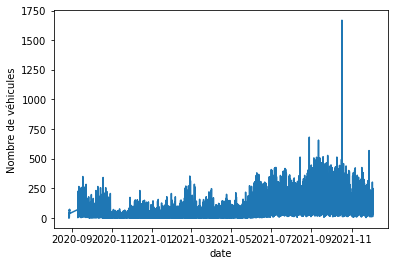

In [182]:
sns.lineplot(data=trot_day, x='date', y='Nombre de véhicules')

Il semble y avoir un problème début septembre. Nous allons inspecter la données début septembre pour s'en assurer.

In [184]:
trot_day.columns=['nb_trot']

In [207]:
trot_day[datetime(2020, 9, 1):datetime(2020, 9, 11)]

,nb_trot
date,
2020-09-10 00:00:00,71
2020-09-10 01:00:00,35
2020-09-10 02:00:00,28
2020-09-10 03:00:00,14
2020-09-10 04:00:00,8
2020-09-10 05:00:00,3
2020-09-10 06:00:00,28
2020-09-10 07:00:00,45
2020-09-10 08:00:00,117


effectivement il manque les 9 premiers jours de septembre. Ces 9 jours débutent un mardi, donc nous allons les remplacer par les données des 9 jours de septembre imméditament suivant débutant un mardi pour lesquels nous avons les données

In [204]:
test_trot.nb_trot.isnull().sum()

414

Il manque quelques autres lignes, nous les traiterons plus tard

In [209]:
trot_day_rw = trot_day.reset_index()

In [229]:
sept = trot_day[datetime(2020, 9, 15):datetime(2020, 9, 24)]
sept = sept.reset_index()
sept['date'][0].date().day

In [233]:
def minus_14(x):
    current_day = x.date().day
    new_day = current_day - 14
    new_date = x.replace(day=new_day)
    return new_date

In [236]:
sept['date'] = sept.date.apply(minus_14)
sept.drop(columns='new_date', inplace=True)
sept = sept.iloc[:-1, :] # car nous avions le minuit du 10 septembre, donc une ligne en trop

In [252]:
trot_day_rw = pd.concat([trot_day_rw, sept])
trot_day = trot_day_rw.set_index('date')
trot_day.sort_index(inplace=True)

In [274]:
new_df.set_index('date', inplace=True)
new_df.sort_index(inplace=True)

KeyError: "None of ['date'] are in the columns"

In [275]:
new_df_trot = pd.merge_asof(new_df, trot_day, left_index=True, right_index=True)
new_df_trot

In [277]:
new_df_trot.to_csv('external_data_covid_trot.csv')